In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datanetor","key":"bab8ca1ac41d8879cfbf88674f3e38eb"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#To change permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 95% 140M/148M [00:02<00:00, 54.1MB/s]
100% 148M/148M [00:02<00:00, 60.3MB/s]


In [5]:
from zipfile import ZipFile
filename = "cotton-disease-dataset.zip"

with ZipFile(filename,'r')  as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
import os
os.listdir("/content/Cotton Disease/train")

['diseased cotton plant',
 'fresh cotton leaf',
 'diseased cotton leaf',
 'fresh cotton plant']

In [7]:
!nvidia-smi

Tue Jan 12 09:03:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 41kB/s 


In [9]:
#importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
import numpy as np

Transfer Learning implemented (Resent50) :
[keras-application-resent](https://keras.io/api/applications/resnet/#resnet50-function)

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [11]:
#Reshaping the image size
IMG_SIZE = [224,224]
train_path = "/content/Cotton Disease/train"
test_path = "/content/Cotton Disease/test"

In [12]:
os.listdir(train_path)

['diseased cotton plant',
 'fresh cotton leaf',
 'diseased cotton leaf',
 'fresh cotton plant']

In [13]:
# Creating instance of ResNet50  and adding the data preprocessing layers
resnet = ResNet50(input_shape=IMG_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [14]:
# Don't train the pre-trained weights
for layer in resnet.layers:
  layer.trainable = False

In [15]:
from glob import glob
folder = glob("/content/Cotton Disease/train/*")
len(folder)

4

In [16]:
# Taking the output of the last convolution block in ResNet50
x = resnet.output
x = Flatten()(x)
x = Dense(units = 1024 , activation = "relu")(x)



In [17]:
prediction = Dense(len(folder), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
#Compiling the model
model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics = ['accuracy'])
 

In [21]:
#Image Augmentation


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [22]:
rnet = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 293s 5s/step - loss: 20.9196 - accuracy: 0.3292 - val_loss: 1.2857 - val_accuracy: 0.5566
Epoch 2/20
61/61 [==============================] - 289s 5s/step - loss: 1.2998 - accuracy: 0.5240 - val_loss: 1.2172 - val_accuracy: 0.5094
Epoch 3/20
61/61 [==============================] - 289s 5s/step - loss: 0.9556 - accuracy: 0.6124 - val_loss: 1.3848 - val_accuracy: 0.5566
Epoch 4/20
61/61 [==============================] - 285s 5s/step - loss: 1.2260 - accuracy: 0.5444 - val_loss: 0.8551 - val_accuracy: 0.6604
Epoch 5/20
61/61 [==============================] - 285s 5s/step - loss: 0.9943 - accuracy: 0.6335 - val_loss: 1.0804 - val_accuracy: 0.6792
Epoch 6/20
61/61 [==============================] - 286s 5s/step - loss: 0.9061 - accuracy: 0.6360 - val_loss: 1.1959 - val_accuracy: 0.5472
Epoch 7/20
61/61 [==============================] - 287s 5s/step - loss: 1.1054 - accuracy: 0.6129 - val_loss: 0.7819 - val_accuracy: 0.6698
Epoch 8/20
6

In [23]:
import matplotlib.pyplot as plt

In [24]:
rnet.history

{'accuracy': [0.39056894183158875,
  0.5253716111183167,
  0.6171194314956665,
  0.5740645527839661,
  0.6396719813346863,
  0.6299333572387695,
  0.6447975635528564,
  0.6545361280441284,
  0.698616087436676,
  0.7273193001747131,
  0.7580727934837341,
  0.7170681953430176,
  0.7083547115325928,
  0.715530514717102,
  0.7073295712471008,
  0.7508969902992249,
  0.7206560969352722,
  0.7611481547355652,
  0.7329574823379517,
  0.765761137008667],
 'loss': [9.747933387756348,
  1.2973955869674683,
  0.9583183526992798,
  1.146322250366211,
  0.9437191486358643,
  0.9568322896957397,
  1.0064431428909302,
  0.890361487865448,
  0.7419907450675964,
  0.7090320587158203,
  0.6127209067344666,
  0.6996259093284607,
  0.703483521938324,
  0.7127171158790588,
  0.7232243418693542,
  0.6465249061584473,
  0.6900635361671448,
  0.5819524526596069,
  0.6695654988288879,
  0.5800841450691223],
 'val_accuracy': [0.5566037893295288,
  0.5094339847564697,
  0.5566037893295288,
  0.6603773832321167,


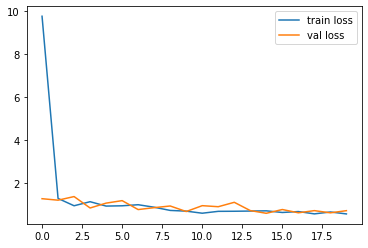

In [25]:
# plotting the loss for train & test
plt.plot(rnet.history['loss'], label='train loss')
plt.plot(rnet.history['val_loss'], label='val loss')
plt.legend()
plt.show()


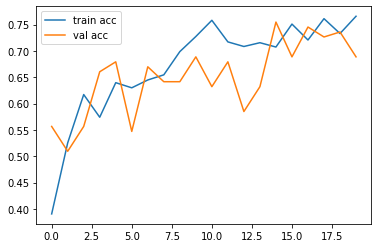

In [27]:
# plotting the accuracy for train & test
plt.plot(rnet.history['accuracy'], label='train acc')
plt.plot(rnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()



In [ ]:
#Validation

In [28]:
y_pred = model.predict(test_set)

In [29]:
y_pred

array([[1.12209655e-01, 6.23947196e-02, 1.15809053e-01, 7.09586620e-01],
       [9.71932769e-01, 3.81021271e-03, 2.36006901e-02, 6.56316464e-04],
       [6.62433915e-03, 4.27306473e-01, 4.08653729e-02, 5.25203884e-01],
       [2.18569916e-02, 2.50580519e-01, 1.06939740e-01, 6.20622754e-01],
       [4.55953963e-02, 5.90706706e-01, 2.13760927e-01, 1.49936974e-01],
       [7.43947504e-03, 9.22267437e-01, 9.02590284e-04, 6.93903863e-02],
       [1.97726652e-01, 1.27486840e-01, 6.55274272e-01, 1.95122547e-02],
       [1.29756716e-03, 3.72426839e-05, 9.98408854e-01, 2.56352330e-04],
       [1.14454376e-02, 1.17247365e-02, 4.77602839e-01, 4.99227047e-01],
       [4.10315813e-03, 1.71583295e-01, 4.19764780e-02, 7.82337129e-01],
       [3.02922390e-02, 1.58195496e-01, 5.07976068e-03, 8.06432545e-01],
       [6.51429640e-03, 5.53647568e-03, 9.52142417e-01, 3.58068533e-02],
       [3.86459287e-03, 8.93571317e-01, 8.48986558e-04, 1.01715140e-01],
       [2.53909659e-02, 6.96236849e-01, 2.86502372e

In [30]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [32]:
y_pred

array([3, 0, 3, 3, 1, 1, 2, 2, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 0, 3, 1, 2,
       3, 3, 2, 2, 1, 3, 0, 2, 2, 1, 3, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3, 2, 1, 1, 2, 0,
       1, 2, 2, 3, 0, 3, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0,
       0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2])

In [ ]:
#Validation using a sample image from test_set

In [33]:
test_img=image.load_img('/content/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [34]:
test_img = image.img_to_array(test_img)

In [38]:
test_img.shape

(224, 224, 3)

In [36]:
test_img = test_img/255

In [39]:
test_img = np.expand_dims(test_img, axis = 0)

In [40]:
result = model.predict(test_img)

In [42]:
result = np.argmax(result, axis=1)

In [43]:
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [46]:
if result == 0:
  prediction = 'diseased cotton leaf'
elif result == 1:
  prediction = 'diseased cotton plant'
elif result == 2:
    prediction = 'fresh cotton leaf'
else:
  prediction = 'fresh cotton plant'

In [47]:
prediction

'diseased cotton leaf'